In [2]:
import pandas as pd
import numpy as np
import pylab as plt

import mysql.connector

mydb = mysql.connector.connect(
  host="172.28.200.50",
  port=3306,
  user="root",
  passwd="insert-password-here",
  database="iiwari_org")
mycursor = mydb.cursor(dictionary=True)

In [4]:
# Tätä muokkaamalla voidaan määrittää se kysely joka suoritetaan
mycursor.execute("SELECT DISTINCT(node_id) FROM SensorData; ");
# ja df-muuttuja voidaan asettaa pandan dataframeksi jossa on tietokannan sisältö
df = pd.DataFrame(mycursor.fetchall())
print(df.values.tolist())

[[b'-2393099149039893833'], [b'-2393099149039893844'], [b'-2393099149039893848'], [b'-2393099149039893859'], [b'-2393099149039893963'], [b'-2393099149039893967'], [b'-2393099149039894097'], [b'-2393099149039894112'], [b'-2393099149039894120'], [b'-2393099149039894124'], [b'-2393099149039894127'], [b'-2393099149039894248'], [b'-2393099149039894352'], [b'-2393099149039894356'], [b'-2393099149039894370'], [b'-2393099149039894378'], [b'-2393099149039894381'], [b'-2393099149039894385'], [b'-2393099149039894500'], [b'-2393099149039894525'], [b'-2393099149040558671'], [b'-2393099149040558682'], [b'-2393099149040558686'], [b'-2393099149040558689'], [b'-2393099149040558719'], [b'-2393099149040558808'], [b'-2393099149040559078'], [b'-2393099149040559089'], [b'-2393099149040559178'], [b'-2393099149040559182'], [b'-2393099149040559444'], [b'4996252679627069957']]


In [5]:
df.node_id

0     b'-2393099149039893833'
1     b'-2393099149039893844'
2     b'-2393099149039893848'
3     b'-2393099149039893859'
4     b'-2393099149039893963'
5     b'-2393099149039893967'
6     b'-2393099149039894097'
7     b'-2393099149039894112'
8     b'-2393099149039894120'
9     b'-2393099149039894124'
10    b'-2393099149039894127'
11    b'-2393099149039894248'
12    b'-2393099149039894352'
13    b'-2393099149039894356'
14    b'-2393099149039894370'
15    b'-2393099149039894378'
16    b'-2393099149039894381'
17    b'-2393099149039894385'
18    b'-2393099149039894500'
19    b'-2393099149039894525'
20    b'-2393099149040558671'
21    b'-2393099149040558682'
22    b'-2393099149040558686'
23    b'-2393099149040558689'
24    b'-2393099149040558719'
25    b'-2393099149040558808'
26    b'-2393099149040559078'
27    b'-2393099149040559089'
28    b'-2393099149040559178'
29    b'-2393099149040559182'
30    b'-2393099149040559444'
31     b'4996252679627069957'
Name: node_id, dtype: object

In [3]:
#datan hakeminen
mycursor.execute("SELECT node_id, timestamp, x,y,z,q FROM SensorData" );
df = pd.DataFrame(mycursor.fetchall())
df.to_csv(r'projekti2.csv')
df

,node_id,timestamp,x,y,z,q
0,b'-2393099149039893833',b'2020-06-24 12:20:08.533016+00:00',2762,-257,100,0
1,b'-2393099149039893833',b'2020-06-24 12:20:08.620015+00:00',2870,-344,100,0
2,b'-2393099149039893833',b'2020-06-24 12:20:09.622827+00:00',2916,-344,100,0
3,b'-2393099149039893833',b'2020-06-24 12:20:09.622846+00:00',2894,-254,100,0
4,b'-2393099149039893833',b'2020-06-24 12:20:10.116102+00:00',2888,-188,100,0
...,...,...,...,...,...,...
13890901,b'4996252679627069957',b'2020-06-01 03:00:05.469336+00:00',635,1064,0,0
13890902,b'4996252679627069957',b'2020-06-01 03:00:06.47926+00:00',681,760,0,0
13890903,b'4996252679627069957',b'2020-06-01 03:00:08.507118+00:00',622,991,0,0
13890904,b'4996252679627069957',b'2020-06-01 03:00:09.547553+00:00',644,1066,0,0


In [67]:
df.node_id

0         b'-2393099149039893833'
1         b'-2393099149039893833'
2         b'-2393099149039893833'
3         b'-2393099149039893833'
4         b'-2393099149039893833'
                   ...           
499995    b'-2393099149039893833'
499996    b'-2393099149039893833'
499997    b'-2393099149039893833'
499998    b'-2393099149039893833'
499999    b'-2393099149039893833'
Name: node_id, Length: 500000, dtype: object

In [7]:
#tällä voi muuttaa node_id:en hiukan kauniimpaan muotoon
df['node_id'] = pd.factorize(df['node_id'])[0] + 1

In [8]:
df['node_id'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])

In [158]:
# Timestampin muokkaaminen siedettävämpään muotoon
df['timestamp'] = df['timestamp'].astype('str')
df['timestamp'] = df['timestamp'].astype('string')
df['timestamp'] = df['timestamp'].str.lstrip("b'")
df['timestamp'] = df['timestamp'].str.rstrip("'+00:00'")
df['timestamp'] = df['timestamp'].astype('datetime64[s]')

    # #Lisätään UTC-timezone takaisin
df.timestamp = df.timestamp.dt.tz_localize('UTC')

    # Muunnetaan Suomen aikaan. Tämä huomioi kesä- ja talviajan.
df.timestamp = df.timestamp.dt.tz_convert('Europe/Helsinki')

In [159]:
df.timestamp

0        2020-06-24 15:20:08+03:00
1        2020-06-24 15:20:08+03:00
2        2020-06-24 15:20:09+03:00
3        2020-06-24 15:20:09+03:00
4        2020-06-24 15:20:10+03:00
                    ...           
499995   2020-10-10 13:53:36+03:00
499996   2020-10-10 13:53:42+03:00
499997   2020-10-10 13:53:43+03:00
499998   2020-10-10 13:53:44+03:00
499999   2020-10-10 13:53:45+03:00
Name: timestamp, Length: 500000, dtype: datetime64[ns, Europe/Helsinki]

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype                          
---  ------     --------------   -----                          
 0   node_id    500000 non-null  object                         
 1   timestamp  500000 non-null  datetime64[ns, Europe/Helsinki]
 2   x          500000 non-null  int64                          
 3   y          500000 non-null  int64                          
 4   z          500000 non-null  int64                          
 5   q          500000 non-null  int64                          
dtypes: datetime64[ns, Europe/Helsinki](1), int64(4), object(1)
memory usage: 22.9+ MB


In [161]:
# duplikaattejen poisto
df = df.drop_duplicates()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499901 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype                          
---  ------     --------------   -----                          
 0   node_id    499901 non-null  int64                          
 1   timestamp  499901 non-null  datetime64[ns, Europe/Helsinki]
 2   x          499901 non-null  int64                          
 3   y          499901 non-null  int64                          
 4   z          499901 non-null  int64                          
 5   q          499901 non-null  int64                          
dtypes: datetime64[ns, Europe/Helsinki](1), int64(5)
memory usage: 26.7 MB


In [138]:
#sortataan timestampin mukaan
df = df.sort_values(by =['timestamp'])
df

,node_id,timestamp,x,y,z,q
0,1,2020-06-24 15:20:08+03:00,2762,-257,100,0
1,1,2020-06-24 15:20:08+03:00,2870,-344,100,0
2,1,2020-06-24 15:20:09+03:00,2916,-344,100,0
3,1,2020-06-24 15:20:09+03:00,2894,-254,100,0
4,1,2020-06-24 15:20:10+03:00,2888,-188,100,0
...,...,...,...,...,...,...
499995,1,2020-10-10 13:53:36+03:00,1787,-178,100,0
499996,1,2020-10-10 13:53:42+03:00,1785,-203,100,0
499997,1,2020-10-10 13:53:43+03:00,1785,-210,100,0
499998,1,2020-10-10 13:53:44+03:00,1779,-219,100,0


In [33]:
mean = np.mean(df['x'])
std = np.std(df['x']) 
print('mean of the dataset is', mean) 
print('std. deviation is', std) 

mean of the dataset is 1988.552571409139
std. deviation is 884.9692172326409


In [34]:
threshold = 3
outlier = [] 
for i in df['x']: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier) 

outlier in dataset is [4675, 5088, 5253, 4826, 5231, 7993, 6369, 6164]


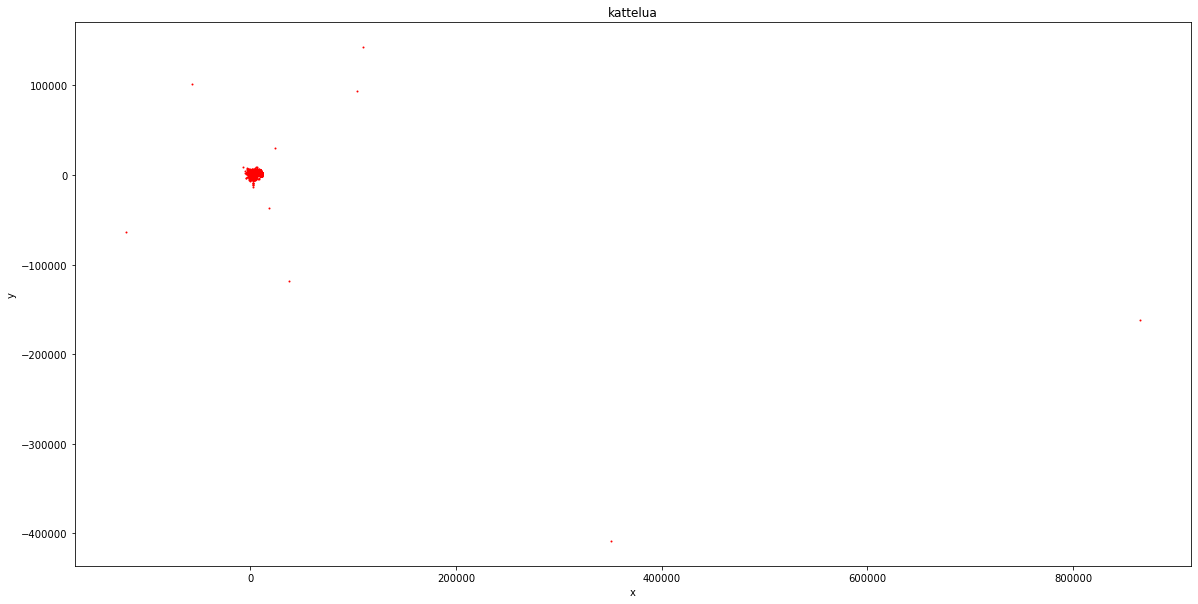

In [9]:
plt.rcParams['figure.figsize'] = [20,10] # Kuvan koon säätö
plt.title('kattelua')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(df['x'],df['y'],color='red', s=1)


In [35]:
mean1 = np.mean(df['y'])
std1 = np.std(df['y']) 
print('mean of the dataset is', mean1) 
print('std. deviation is', std1) 

mean of the dataset is 534.1365850438386
std. deviation is 1063.6144540556888


In [36]:
threshold = 3
outlier = [] 
for i in df['y']: 
    z1 = (i-mean)/std 
    if z1 > threshold: 
        outlier.append(i) 
print('outlier in dataset is', outlier) 

outlier in dataset is [5255, 6194, 4736, 6108, 5264, 5214]


In [72]:
upper = df.x.mean() + 3*df.x.std()
lower = df.x.mean() -3*df.x.std()
print(upper)
print(lower)



4643.3417206713075
-666.249948671307


In [73]:
new_df= df[(df.x<upper) & (df.x>lower)]

In [74]:
df['zscore'] = ( df.x - df.x.mean() ) / df.x.std()

In [77]:
df[df['zscore']>3]

,node_id,timestamp,x,y,z,q,zscore
6160,1,2020-06-26 15:27:06+03:00,4675,4075,100,0,3.035775
6161,1,2020-06-26 15:27:06+03:00,5088,4466,100,0,3.502477
7386,1,2020-06-26 19:21:32+03:00,5253,4451,100,0,3.688932
7388,1,2020-06-26 19:21:35+03:00,4826,4217,100,0,3.206409
194045,1,2020-08-18 19:12:03+03:00,5231,-3186,100,0,3.664072
196810,1,2020-08-19 18:54:26+03:00,7993,-2963,100,0,6.785216
199138,1,2020-08-20 16:33:03+03:00,6369,5264,100,0,4.950046
199139,1,2020-08-20 16:33:03+03:00,6164,5214,100,0,4.718390


In [78]:
df[df['zscore']<-3]

,node_id,timestamp,x,y,z,q,zscore
67,1,2020-06-24 15:22:20+03:00,-1498,5255,100,0,-3.939903
7436,1,2020-06-26 19:22:57+03:00,-1744,4581,100,0,-4.217890
7477,1,2020-06-26 19:23:46+03:00,-779,2868,100,0,-3.127411
117030,1,2020-07-21 19:23:59+03:00,-668,3235,100,0,-3.001978
192752,1,2020-08-18 17:05:48+03:00,-1990,4452,100,0,-4.495878
...,...,...,...,...,...,...,...
419127,1,2020-09-27 15:52:58+03:00,-818,1845,100,0,-3.171482
419129,1,2020-09-27 15:53:07+03:00,-896,1881,100,0,-3.259625
419131,1,2020-09-27 15:53:17+03:00,-943,1899,100,0,-3.312736
419560,1,2020-09-27 16:14:35+03:00,-794,1777,100,0,-3.144361


In [85]:
df_new = df[(df.zscore>-3) & (df.zscore<3)]
df_new

,node_id,timestamp,x,y,z,q,zscore,zscorey
0,1,2020-06-24 15:20:08+03:00,2762,-257,100,0,0.874027,-0.743770
1,1,2020-06-24 15:20:08+03:00,2870,-344,100,0,0.996070,-0.825571
2,1,2020-06-24 15:20:09+03:00,2916,-344,100,0,1.048051,-0.825571
3,1,2020-06-24 15:20:09+03:00,2894,-254,100,0,1.023191,-0.740949
4,1,2020-06-24 15:20:10+03:00,2888,-188,100,0,1.016410,-0.678894
...,...,...,...,...,...,...,...,...
499995,1,2020-10-10 13:53:36+03:00,1787,-178,100,0,-0.227753,-0.669491
499996,1,2020-10-10 13:53:42+03:00,1785,-203,100,0,-0.230013,-0.692997
499997,1,2020-10-10 13:53:43+03:00,1785,-210,100,0,-0.230013,-0.699579
499998,1,2020-10-10 13:53:44+03:00,1779,-219,100,0,-0.236793,-0.708041


In [80]:
uppery = df.y.mean() + 3*df.y.std()
lowery = df.y.mean() -3*df.y.std()
print(uppery)
print(lowery)

3724.731606856169
-2656.640578856169


In [81]:
new_dfy= df[(df.y<uppery) & (df.y>lowery)]


In [82]:
df['zscorey'] = ( df.y - df.y.mean() ) / df.y.std()

In [86]:
df_newy = df[(df.zscorey>-3) & (df.zscorey<3)]
df_newy

,node_id,timestamp,x,y,z,q,zscore,zscorey
0,1,2020-06-24 15:20:08+03:00,2762,-257,100,0,0.874027,-0.743770
1,1,2020-06-24 15:20:08+03:00,2870,-344,100,0,0.996070,-0.825571
2,1,2020-06-24 15:20:09+03:00,2916,-344,100,0,1.048051,-0.825571
3,1,2020-06-24 15:20:09+03:00,2894,-254,100,0,1.023191,-0.740949
4,1,2020-06-24 15:20:10+03:00,2888,-188,100,0,1.016410,-0.678894
...,...,...,...,...,...,...,...,...
499995,1,2020-10-10 13:53:36+03:00,1787,-178,100,0,-0.227753,-0.669491
499996,1,2020-10-10 13:53:42+03:00,1785,-203,100,0,-0.230013,-0.692997
499997,1,2020-10-10 13:53:43+03:00,1785,-210,100,0,-0.230013,-0.699579
499998,1,2020-10-10 13:53:44+03:00,1779,-219,100,0,-0.236793,-0.708041


In [96]:
frames = [new_df, new_dfy]
df_final = pd.concat(frames)


In [97]:
df_final.drop_duplicates()

,node_id,timestamp,x,y,z,q,zscore
0,1,2020-06-24 15:20:08+03:00,2762,-257,100,0,NaN
1,1,2020-06-24 15:20:08+03:00,2870,-344,100,0,NaN
2,1,2020-06-24 15:20:09+03:00,2916,-344,100,0,NaN
3,1,2020-06-24 15:20:09+03:00,2894,-254,100,0,NaN
4,1,2020-06-24 15:20:10+03:00,2888,-188,100,0,NaN
...,...,...,...,...,...,...,...
499995,1,2020-10-10 13:53:36+03:00,1787,-178,100,0,-0.227753
499996,1,2020-10-10 13:53:42+03:00,1785,-203,100,0,-0.230013
499997,1,2020-10-10 13:53:43+03:00,1785,-210,100,0,-0.230013
499998,1,2020-10-10 13:53:44+03:00,1779,-219,100,0,-0.236793


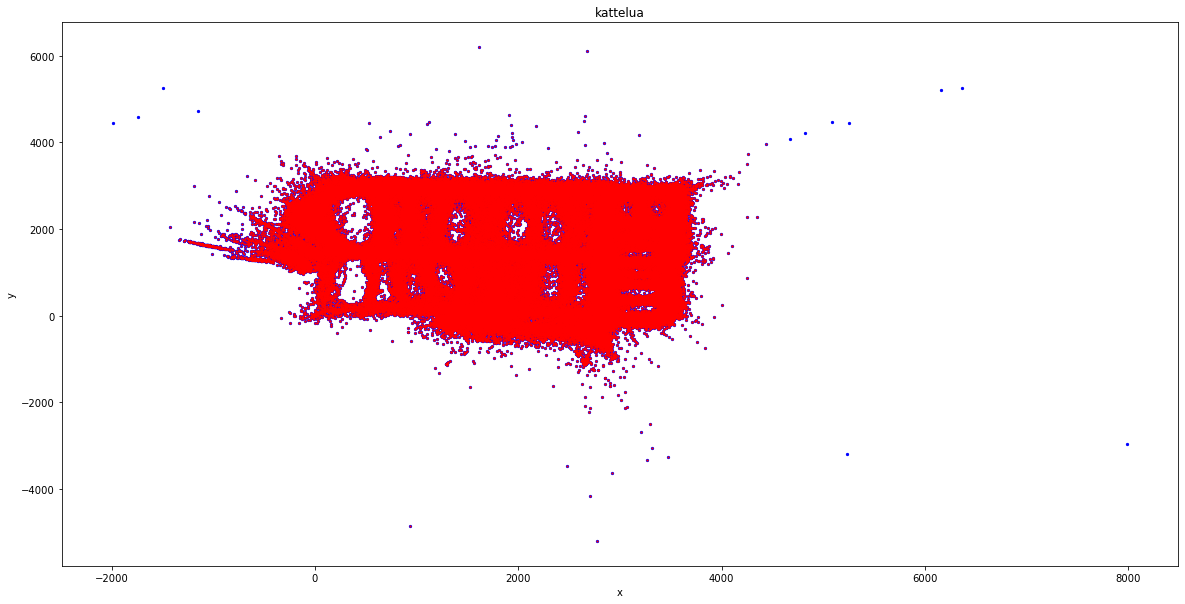

In [98]:
plt.rcParams['figure.figsize'] = [20,10] # Kuvan koon säätö
plt.title('kattelua')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(df['x'],df['y'],color='blue', s=5)
plt.scatter(df_final['x'],df_final['y'],color='red', s=1)

In [11]:
# Yritetäämpä uudetaan hiukan eri tyylillä
#Käytetään zscore-kirjastoa outlierien poistamiseen
from scipy.stats import zscore


In [12]:
z_scores = zscore(df[['x', 'y']])

In [13]:
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 2.7).all(axis=1)
new_df1 = df[filtered_entries]
print(new_df1)

          node_id                            timestamp     x     y    z  q
0               1  b'2020-06-24 12:20:08.533016+00:00'  2762  -257  100  0
1               1  b'2020-06-24 12:20:08.620015+00:00'  2870  -344  100  0
2               1  b'2020-06-24 12:20:09.622827+00:00'  2916  -344  100  0
3               1  b'2020-06-24 12:20:09.622846+00:00'  2894  -254  100  0
4               1  b'2020-06-24 12:20:10.116102+00:00'  2888  -188  100  0
...           ...                                  ...   ...   ...  ... ..
13890901       32  b'2020-06-01 03:00:05.469336+00:00'   635  1064    0  0
13890902       32   b'2020-06-01 03:00:06.47926+00:00'   681   760    0  0
13890903       32  b'2020-06-01 03:00:08.507118+00:00'   622   991    0  0
13890904       32  b'2020-06-01 03:00:09.547553+00:00'   644  1066    0  0
13890905       32  b'2020-06-01 03:00:10.968327+00:00'   634  1054    0  0

[13554245 rows x 6 columns]


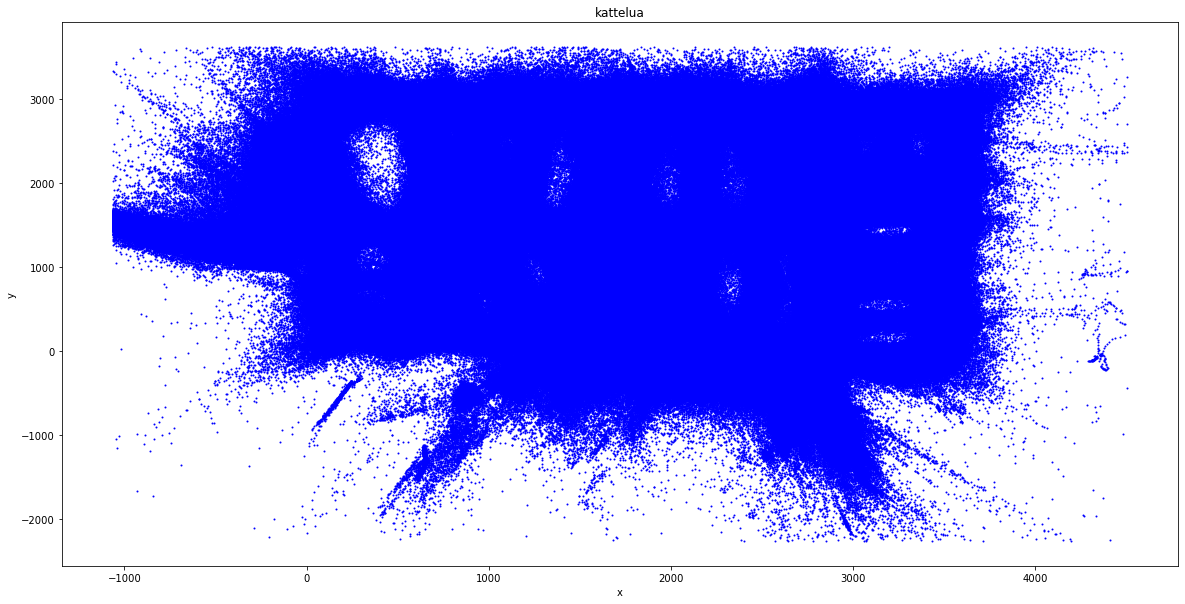

In [15]:
# Piirretään päällekkäin alkuperäinen plotti ja se missä outlierit on poistettu, tällä nähdään hieman, mistä outliereitä on hävinnyt
plt.rcParams['figure.figsize'] = [20,10] # Kuvan koon säätö
plt.title('kattelua')
plt.xlabel('x')
plt.ylabel('y')


plt.scatter(new_df1['x'],new_df1['y'],color='blue', s=1)


In [143]:
#normalisoidaan data
from sklearn import preprocessing

x = new_df[['x','y']].values
min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x)
df_normalized = pd.DataFrame(x_scaled)
df_normalized = df_normalized.rename(columns={0: 'x', 1: 'y'})

df_normalized

,x,y
0,0.684232,0.361566
1,0.705788,0.347610
2,0.714970,0.347610
3,0.710579,0.362047
4,0.709381,0.372634
...,...,...
499607,0.489621,0.374238
499608,0.489222,0.370228
499609,0.489222,0.369105
499610,0.488024,0.367661


In [149]:
data = pd.DataFrame()
data['x'], data['y'] = df_normalized['x'],df_normalized['y']


from sklearn.ensemble import IsolationForest
rs=np.random.RandomState(0)
clf = IsolationForest(max_samples=400000,random_state=rs, contamination=.01) 
clf.fit(data)
if_scores = clf.decision_function(data)
if_anomalies=clf.predict(data)
if_anomalies=pd.Series(if_anomalies).replace([-1,1],[1,0])
if_anomalies=data[if_anomalies==1]

Text(0.5, 1.0, 'Isolation Forests')

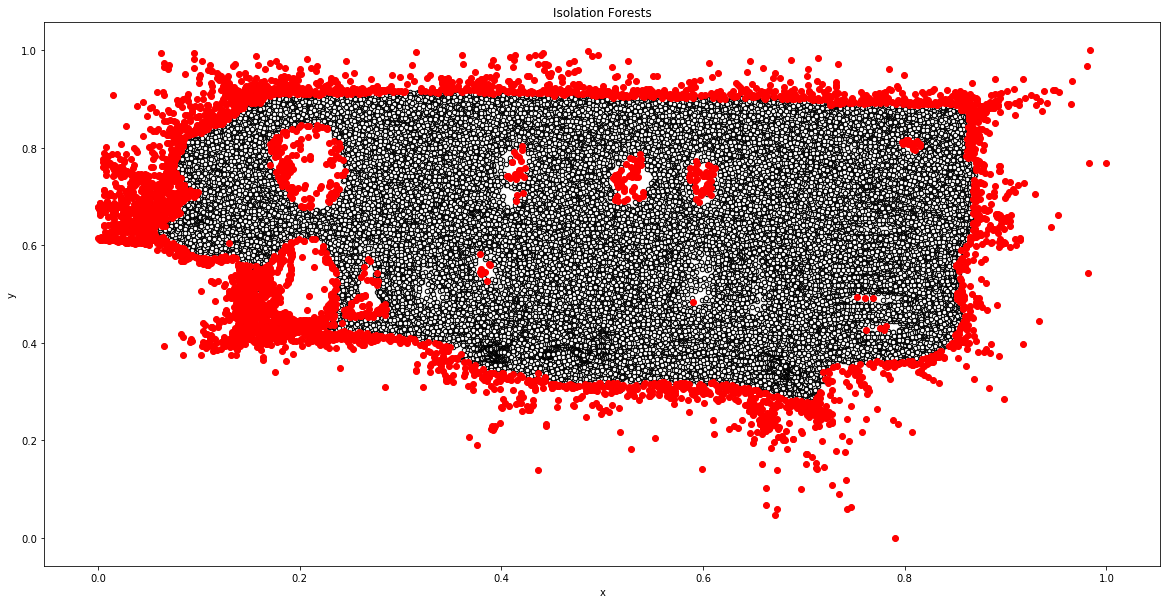

In [148]:
cmap=np.array(['white','red'])
plt.scatter(data.iloc[:,0],data.iloc[:,1],c='white',s=20,edgecolor='k')
plt.scatter(if_anomalies.iloc[:,0],if_anomalies.iloc[:,1],c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Isolation Forests')

In [151]:
from sklearn.preprocessing import StandardScaler
X_train = df[['x','y']]
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
#Stantardscaler stantardoi train datan

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3331, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-153-6443d46ffa5a>", line 1, in <module>
    X_train_std.head()
AttributeError: 'numpy.ndarray' object has no attribute 'head'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2044, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/IPython/core/ultratb.py", line 1151, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/opt/conda/lib/python3.7/site-packages

AttributeError: 'numpy.ndarray' object has no attribute 'head'